In [270]:
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import preprocess
from skimage.color import label2rgb
from skimage import morphology, filters
plt.rcParams['image.cmap'] = 'gray'

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, cm
from skimage.draw import polygon2mask
from scipy import ndimage
from PIL import Image
from src.preprocessing import process_image, process_video, preprocess
from skimage.color import label2rgb
from skimage.morphology import label
from IPython.display import display, clear_output
from skimage.measure import regionprops

In [272]:
# Creating image
dimensions=(1002,1002)
im = np.random.normal(size=(dimensions))
imLabels = preprocess(im, threshold=0.3, disk_size=4)

In [273]:
# # Smoothed image
# fig, ax = plt.subplots(1,3, figsize=(15,5))
# ax[0].imshow(im)
# ax[0].set_title('Smoothed image')
# ax[0].axis('off')
# ax[1].imshow(imLabels != 0)
# ax[1].set_title('Thresholded image')
# ax[1].axis('off')
# ax[2].imshow(label2rgb(imLabels, bg_label=0))
# ax[2].set_title('Labeled image')
# ax[2].axis('off')

# plt.tight_layout()
# plt.show()

KeyboardInterrupt: 

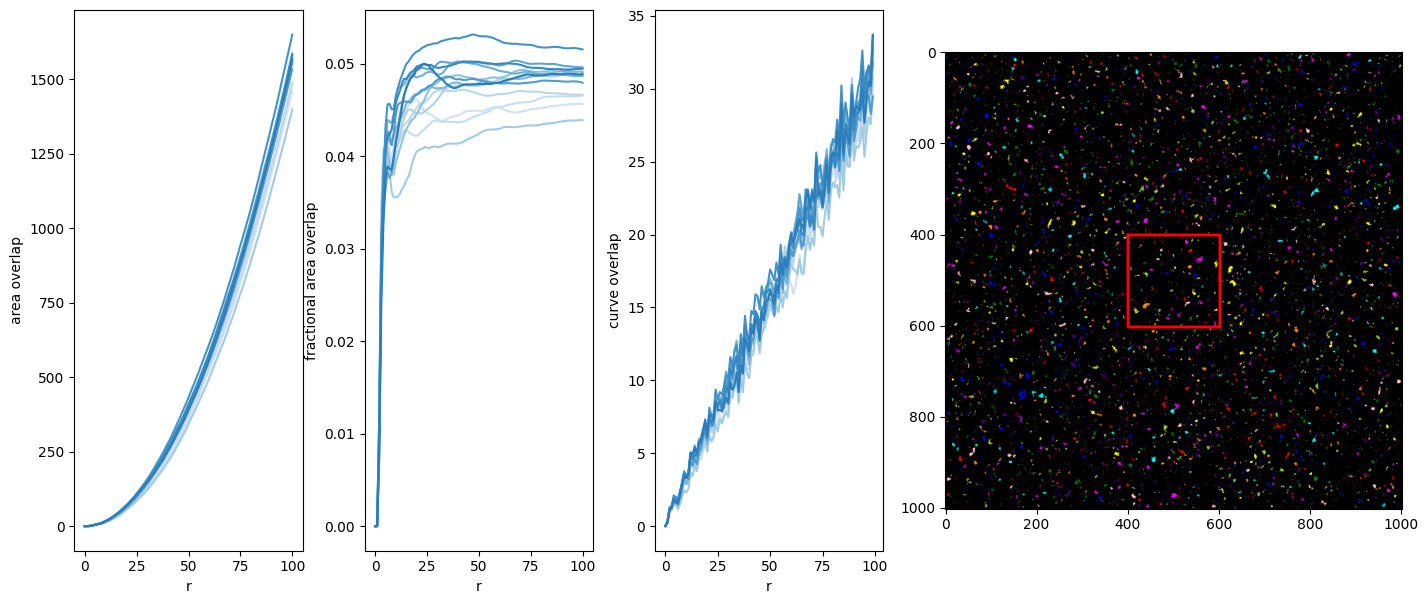

In [276]:
fig, ax = plt.subplots(1,4, figsize=(14,6), gridspec_kw={'width_ratios': [1, 1, 1, 2]})
fig.subplots_adjust(wspace=0.4)
plt.tight_layout()

len=20
colors = cm.Blues(np.linspace(0.2, 1, len))

for p in range(len):
    im = np.random.normal(size=(dimensions))
    label_image = preprocess(im, threshold=0.3, disk_size=4)
    # label_image = label_image[300:700, 300:700]

    L = 400 # Maximum distances to consider
    M = label_image.shape[0] - L
    maxR = 100

    label_image_bounded = np.zeros(label_image.shape, dtype=int)
    cluster_num = 1
    for region in regionprops(label_image):
        minr, minc, maxr, maxc = region.bbox
        if (minr > L+1) and (minc > L+1) and (maxr < M-1) and (maxc < M-1):
            pixel_coordinates = region.coords
            label_image_bounded[pixel_coordinates[:,0],  pixel_coordinates[:,1]] =  cluster_num
            cluster_num += 1

    bx = (L, M, M, L, L)
    by = (L, L, M, M, L)
    ax[3].plot(bx, by, '-r')
    ax[3].imshow(label2rgb(label_image, bg_label=0))
    curr_image = label_image_bounded

    F = np.zeros(maxR+1)
    G = np.zeros(maxR+1)
    for cluster in range(1, curr_image.max()+1):
        ref_cluster = curr_image == cluster
        rem_clusters = label_image * np.invert(ref_cluster)
        
        D = ndimage.distance_transform_edt(ref_cluster==0)
        f = np.zeros(maxR+1)
        g = np.zeros(maxR+1)
        for i in range(0,maxR+1):
            K = D <= i
            f[i] = np.count_nonzero(K*rem_clusters)
            g[i] = np.count_nonzero(K)
        
        F += f
        G += g 

    F = F / curr_image.max()
    G = G / curr_image.max()

    ax[0].plot(F, color=colors[p])
    ax[0].set_xlabel('r')
    ax[0].set_ylabel('area overlap')

    ax[1].plot(F/G, color=colors[p])
    ax[1].set_xlabel('r')
    ax[1].set_ylabel('fractional area overlap')

    ax[2].plot(F[1:]-F[:-1], color=colors[p])
    ax[2].set_xlabel('r')
    ax[2].set_ylabel('curve overlap')

    # Saves to folder called 'temp2'
    filename = 'temp2/subplot_{:03d}.png'.format(p)
    fig.savefig(filename)
    display(fig)
    clear_output(wait = True)
plt.show()